In [1]:
# Code Clause - Artificial Intelligence Internship

# Allocated Project :- Task - 1

# House Price Prediction

In [2]:
import warnings

warnings.simplefilter('ignore')

In [3]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# importing Dataset

df = pd.read_csv('kc_house_data.csv')

In [6]:
# Exploring the Dataset

print(df.shape)

df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Copying The Dataset into Other Variable Incase of test and failure in trainig the model

df_copy = df.copy()

In [8]:
print(df.id.nunique())

# we seen that the id is almost unique we will drop this feature

df.drop('id', axis = 1, inplace = True)

21436


In [9]:
# we will check for any missing values

print(df.isna().sum())

#we seen that there are no missing values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [10]:
# Let's now convert given date column to look like a perfect date column

df['Date']= pd.to_datetime(df.date)

In [11]:
print(df.Date.dt.year.nunique())
print(df.Date.dt.month.nunique())
print(df.Date.dt.week.nunique())
print(df.Date.dt.dayofweek.nunique())

# we can convert these variables as new columns 

2
12
52
7


In [12]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['quarter'] = df.Date.dt.quarter
df['weekday'] = df.Date.dt.dayofweek

# making date columns

In [13]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,Date,Year,Month,quarter,weekday
21373,20140804T000000,325000.0,4,3.25,2800,5291,2.0,0,0,3,...,98022,47.1937,-121.977,2380,5291,2014-08-04,2014,8,3,0
7969,20140721T000000,500000.0,3,2.50,2410,34848,1.5,0,0,3,...,98006,47.5694,-122.120,2420,16424,2014-07-21,2014,7,3,0
5236,20141223T000000,199999.0,3,1.00,960,10815,1.0,0,0,5,...,98010,47.3091,-122.006,1330,10815,2014-12-23,2014,12,4,1
15822,20140704T000000,600000.0,3,2.50,2320,7609,2.0,0,0,3,...,98027,47.5391,-122.069,2590,4000,2014-07-04,2014,7,3,4
17021,20140820T000000,173250.0,3,2.00,1210,9097,1.0,0,0,4,...,98168,47.4849,-122.303,1360,10125,2014-08-20,2014,8,3,2
1499,20150227T000000,720000.0,4,2.75,3370,7634,1.0,0,2,5,...,98056,47.5259,-122.204,2460,7634,2015-02-27,2015,2,1,4
5913,20150310T000000,415000.0,3,2.75,2080,9600,1.0,0,0,3,...,98028,47.7698,-122.238,2220,9600,2015-03-10,2015,3,1,1
16353,20150501T000000,201000.0,3,1.00,900,7576,1.0,0,0,4,...,98002,47.2881,-122.220,1220,7452,2015-05-01,2015,5,2,4
19064,20140709T000000,495000.0,3,2.00,2660,192099,1.0,0,0,4,...,98022,47.2098,-122.016,2570,43561,2014-07-09,2014,7,3,2
5224,20140721T000000,485000.0,3,2.50,2870,5490,2.0,0,0,3,...,98055,47.4471,-122.207,3040,5442,2014-07-21,2014,7,3,0


In [14]:
# let's now check the other features in the dataset
print(f'number of unique values in "lat" are: {df.lat.nunique()}') # there seems to be 5k locations, we will drop this variable for now. 

print(f'number of uniques values in "long" are: {df.long.nunique()}') # we will drop this variable as well for now.

df.drop(['lat', 'long'], axis= 1, inplace= True)

number of unique values in "lat" are: 5034
number of uniques values in "long" are: 752


<AxesSubplot:xlabel='price', ylabel='Density'>

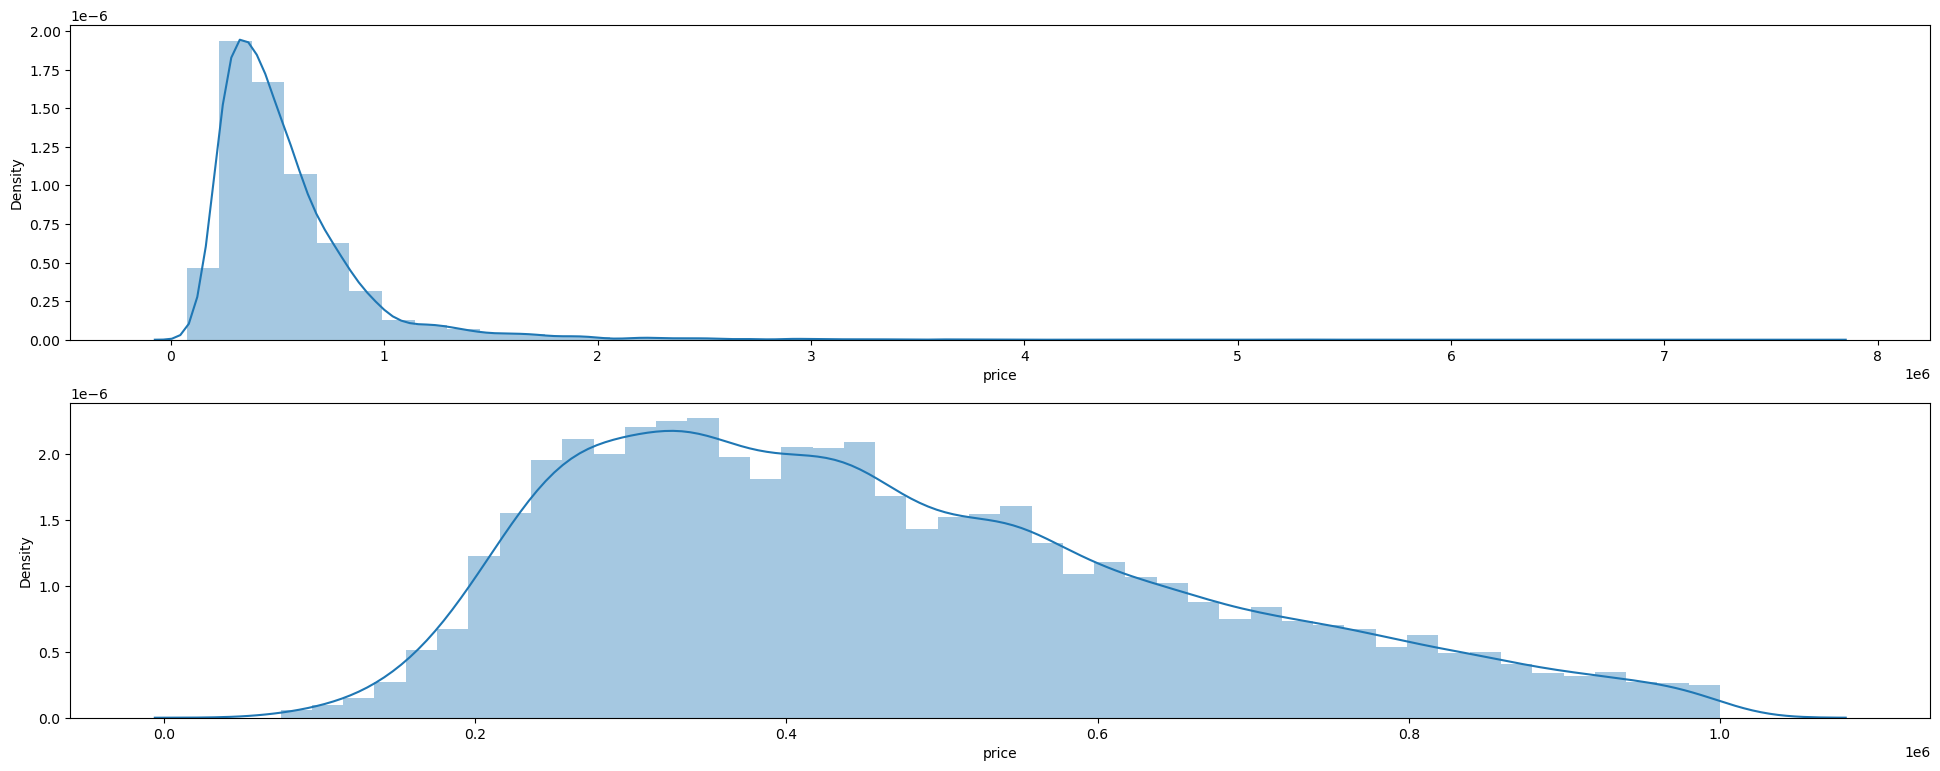

In [15]:
plt.figure(figsize= (24, 9))

plt.subplot(2, 1, 1)

sns.distplot(df.price)

plt.subplot(2, 1, 2)

sns.distplot(df.loc[df.price < 1000000, 'price'], )

# we see that most house prices are below a million and in that below 400 thousand

In [16]:
# we see that there are a number of different sqft listed, we will create a single feature by adding them

sqft_cols = ['sqft_living', 'sqft_above', 'sqft_basement'] 

print(pd.concat([df[sqft_cols].sum(axis= 1), df[sqft_cols]], axis=1).head()) 
# we see that the calculation is now much more realistic

df['Total_sqft']= df[sqft_cols].sum(axis= 1)

#let's check the unique values in the floor feature

print(f'Unique values in floors: {sorted(df.floors.unique())}')
print(f'number of unique values in floors: {df.floors.nunique()}')

# we see that there are 0.5 floors in the variable, let's explore these observations more carefully

      0  sqft_living  sqft_above  sqft_basement
0  2360         1180        1180              0
1  5140         2570        2170            400
2  1540          770         770              0
3  3920         1960        1050            910
4  3360         1680        1680              0
Unique values in floors: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
number of unique values in floors: 6


In [17]:
# we will have to convert the datatype to object first

df['floors']= df['floors'].astype('object')

df.loc[(df.floors == 1.5) | (df.floors == 2.5) | (df.floors == 3.5), df.columns[df.columns.str.contains(r'Total|above|basement|living|floors')]].sample(20)

# a little research and I found out that .5 is usally a compromise between between one and two floors,
# we will go without making any changed for now and make this a categorical variable

,sqft_living,floors,sqft_above,sqft_basement,sqft_living15,Total_sqft
17295,1970,1.5,1500,470,1980,3940
4914,2380,1.5,1470,910,1300,4760
9406,1200,1.5,1200,0,1480,2400
14761,1560,1.5,1140,420,1850,3120
9820,840,1.5,840,0,1560,1680
8787,2130,1.5,1570,560,1638,4260
10827,3530,2.5,3530,0,2960,7060
8399,1360,1.5,1360,0,1960,2720
7696,2130,1.5,2130,0,1490,4260
4362,1120,1.5,1120,0,1640,2240


In [18]:
print(df.condition.nunique())
print(df.condition.unique()) # there are 5 unique values, however can't say which is best and worst, 
# but we use the feature anyway

5
[3 5 4 1 2]


In [19]:
print(df.grade.nunique())
print(df.grade.unique()) # we see there are 12 unique variables, similiar to condition

12
[ 7  6  8 11  9  5 10 12  4  3 13  1]


In [20]:
print(df['yr_built'].nunique())
print(df['yr_built'].unique()) #there are 116 unique values, let's plot this to get a better picture

116
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]


(array([ 3456.,  6383.,  8968., 11754., 14708., 17457., 18745., 19869.,
        20813., 21613.]),
 array([ -1. ,  10.6,  22.2,  33.8,  45.4,  57. ,  68.6,  80.2,  91.8,
        103.4, 115. ]),
 <BarContainer object of 10 artists>)

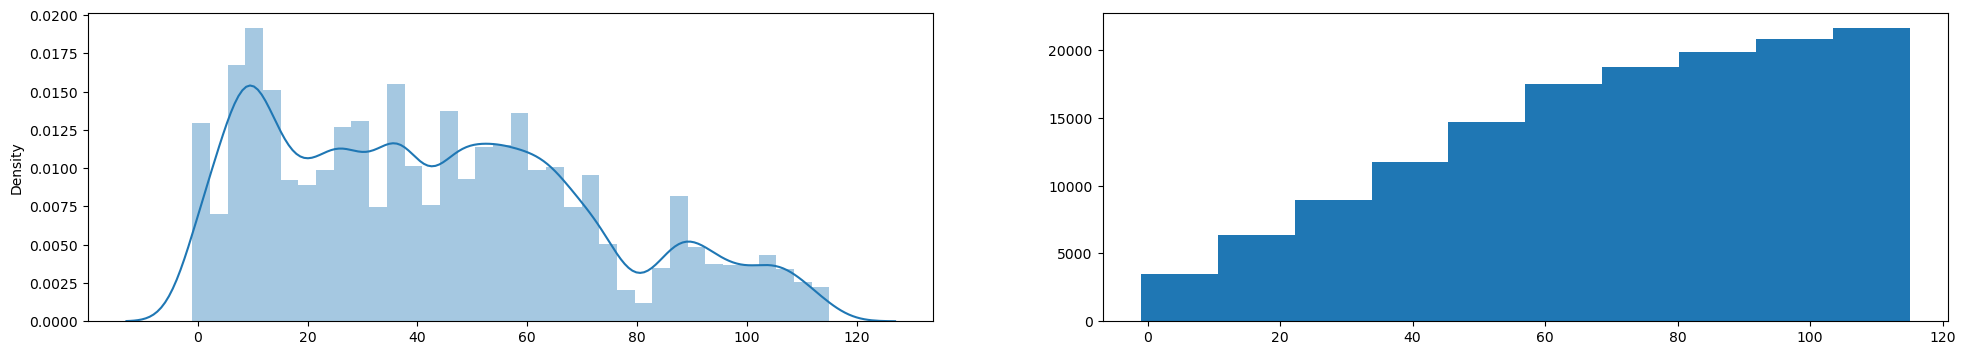

In [21]:
plt.figure(figsize= (24, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Year'].sub(df['yr_built'])) #this will give the age of the house in the year it was sold

plt.subplot(1, 2, 2)
plt.hist(df['Year'].sub(df['yr_built']), cumulative= True)

# we see that most houses are less than 60 years old. We will create bins for age of houses instead of years

In [22]:
df['Year'].sub(df['yr_built']).min() # there is a negative value, which we will investigate this now.

print(len(df.loc[df['Year'].sub(df['yr_built']) == -1]))

# there are 442 observations with negative value for age of house

df.loc[df['Year'].sub(df['yr_built']) == -1].sample(10)

## the observations show that the year built is a year later than the year sold, this could mean that 
## the house could have been while still under construction bought in the constrcution phase,
## but we will change these values to 1 for now.

12


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,Date,Year,Month,quarter,weekday,Total_sqft
20852,20140709T000000,595000.0,4,3.25,3730,4560,2.0,0,0,3,...,0,98103,1800,4560,2014-07-09,2014,7,3,2,7460
21372,20140520T000000,490000.0,5,3.50,4460,2975,3.0,0,2,3,...,0,98119,2490,4231,2014-05-20,2014,5,2,1,8920
1763,20140625T000000,597326.0,4,4.00,3570,8250,2.0,0,0,3,...,0,98040,2230,10000,2014-06-25,2014,6,2,2,7140
20963,20140731T000000,230000.0,3,1.50,1040,1264,2.0,0,0,3,...,0,98144,1350,3000,2014-07-31,2014,7,3,3,2080
7526,20141231T000000,614285.0,5,2.75,2730,6401,2.0,0,0,3,...,0,98072,2520,6126,2014-12-31,2014,12,4,2,5460
20770,20140828T000000,357000.0,5,2.50,2990,9240,2.0,0,0,3,...,0,98133,1970,18110,2014-08-28,2014,8,3,3,5980
2687,20141029T000000,385195.0,1,1.00,710,6000,1.5,0,0,3,...,0,98144,1440,4800,2014-10-29,2014,10,4,2,1420
8039,20140624T000000,455000.0,2,1.50,1200,1259,2.0,0,0,3,...,0,98144,1320,1852,2014-06-24,2014,6,2,1,2400
14489,20140826T000000,500000.0,2,2.25,1570,1269,2.0,0,0,3,...,0,98199,1570,6000,2014-08-26,2014,8,3,1,3140
21262,20141125T000000,559000.0,2,3.00,1650,960,3.0,0,0,3,...,0,98103,1650,3000,2014-11-25,2014,11,4,1,3300


In [23]:
df['age_of_house']= df['Year'].sub(df['yr_built']) 
# here we are creating a new variable to calculate the age of the house and then create bins for them later

print(df['age_of_house'].nunique())
print(df['age_of_house'].unique())

# let's proceed to create bins. we'll check the minimum and maximum values for our reference

print(f'Lowest value in age variable is: {df["age_of_house"].min()}')
print(f'Highest value in age variable is: {df["age_of_house"].max()}')
# highest value in the field is 115, and lowest is -1, this means that the house was pre-booked

117
[ 59  63  82  49  28  13  19  52  55  12  50  72  87  37 115  36  20  98
  93  46  67  29  73  99 105  66  10  11   9  85  33  84  81 110  18  14
  30   0  92  62  64  34  88   6  24  60  41  35  89  25  43  58  74  22
  51  53   8  26  75  68  48  39 104  31 114   4  69  65  90  27 101  47
  54 109   7  61  15  38  16 113  21  94  45 100 111  96  97  86 103  78
  77  76 107  40  57 102  17  71   1  23  91  42  95   2  32   3  56  70
  44 112   5  80  83 106 108  79  -1]
Lowest value in age variable is: -1
Highest value in age variable is: 115


In [24]:
age_cond = [
    ((df['age_of_house']>= 0) & (df['age_of_house']<= 20)),
    ((df['age_of_house']> 20) & (df['age_of_house']<= 40)),
    ((df['age_of_house']> 40) & (df['age_of_house']<= 60)),
    ((df['age_of_house']> 60) & (df['age_of_house']<= 80)),
    ((df['age_of_house']> 80) & (df['age_of_house']<= 100)),
    (df['age_of_house']> 100),
    (df['age_of_house']< 0)
]

age_choices = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+', 'Pre-booked']


age_bins= np.select(age_cond, choicelist=age_choices, default='Missed')
# let's now check the variable to see if everything went right

In [25]:
# pd.concat([pd.Series(age_bins), df['age_of_house']], axis= 1).sample(20)
# # we see that all the sample bins were created correctly.

# #we'll procees and add this to the DataFrame

df['age_bins']= age_bins

df['age_bins'].value_counts(dropna= False)
# Perfecto!
# we see that there are only 12 pre-booked houses.

0-20          5962
21-40         5006
41-60         4674
61-80         3091
81-100        1856
100+          1012
Pre-booked      12
Name: age_bins, dtype: int64

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,Date,Year,Month,quarter,weekday,Total_sqft,age_of_house,age_bins
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,2014-10-13,2014,10,4,0,2360,59,41-60
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,2014-12-09,2014,12,4,1,5140,63,61-80
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2015-02-25,2015,2,1,2,1540,82,81-100
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,2014-12-09,2014,12,4,1,3920,49,41-60
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2015-02-18,2015,2,1,2,3360,28,21-40


In [27]:
# let's check the yr_renovated feature now.

print(df['yr_renovated'].nunique())
# we see that there are 70 values, let's create a variable for renovation age also a binary column 
# indicating if any renovation was done to the house.

modification_age = np.where(df['yr_renovated']== 0, 0, df['Year'].sub(df['yr_built']))

modification_age[:50]
# We see that there are very less modifications done, so we need not create a separate binary column to 
# idicate this, we can create one column with the age which can again be a bin and 0s can be converted to 
# string sying 'not renovated'

70


array([ 0, 63,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 84,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [28]:
reno_cond = [
    ((modification_age>0) & (modification_age<= 20)),
    ((modification_age>20) & (modification_age<= 40)),
    ((modification_age>40) & (modification_age<= 60)),
    ((modification_age>60) & (modification_age<= 80)),
    ((modification_age>80) & (modification_age<= 100)),
    (modification_age> 100), (modification_age == 0)
] # we can copy paste this condition from age choice and make necessary changes to it

reno_choices = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+', 'Not Renovated']

reno_variable= np.select(reno_cond, reno_choices, default='Missed')

print(reno_variable[:50])

print(modification_age[:50])

# we see that the conditions were applied correctly.

['Not Renovated' '61-80' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' '81-100' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated'
 'Not Renovated' 'Not Renovated' 'Not Renovated' 'Not Renovated']
[ 0 63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [29]:
df['renovations']= reno_variable

print(df['renovations'].value_counts(dropna= False))
# perfecto!
# Here however we see that not many houses have been renovated, so we have limited data, we can club these 
# ages to just say renovated making the column a binary variable.
df['renovations']= np.where(df['renovations']== 'Not Renovated', 'Not Renovated', 'Renovated')

print(df['renovations'].value_counts(dropna= False)) # we just have 914 values for renovated this might 
# not make any difference in the model, we'll check this later


Not Renovated    20699
61-80              291
81-100             215
41-60              184
100+               161
21-40               58
0-20                 5
Name: renovations, dtype: int64
Not Renovated    20699
Renovated          914
Name: renovations, dtype: int64


In [30]:
# let's check zipcode

df['zipcode'].nunique() # We have 70 values for zipcodes, we will drop them later or check if we can use 
# them somehow.

70

In [31]:
print(pd.concat([df[df.columns[df.columns.str.contains('living')]], df['renovations']], axis= 1).sample(10))

# we see that sqft_living in 2015 has changed(decreased or increased) in some observations but not 
# marked as renovated. We do not know why this is, so we will create a categorical variable that says 
# "decreased", "increased" or "unchanged"

sqft_living_conds= [
    (df['sqft_living15'].sub(df['sqft_living']) < 0),
    (df['sqft_living15'].sub(df['sqft_living']) > 0),
    (df['sqft_living15'].sub(df['sqft_living']) == 0)
]

sqft_living_choices= ['Decreased', 'Increased', 'Unchanged']

sqft_change= np.select(sqft_living_conds, sqft_living_choices, 'Missed')

print(pd.concat([pd.Series(sqft_change), df[df.columns[df.columns.str.contains('living')]]], axis= 1).head(7))
# we see that the conds were applied correctly.

       sqft_living  sqft_living15    renovations
7575           810            900  Not Renovated
5366          1060           1300  Not Renovated
5729          2700           2120  Not Renovated
9938          2420           2210  Not Renovated
4913          1900           1900  Not Renovated
9007          1320           1310  Not Renovated
2363          1920           1920  Not Renovated
3203          2940           2620  Not Renovated
220           2760           3070  Not Renovated
17906         1510           1510  Not Renovated
           0  sqft_living  sqft_living15
0  Increased         1180           1340
1  Decreased         2570           1690
2  Increased          770           2720
3  Decreased         1960           1360
4  Increased         1680           1800
5  Decreased         5420           4760
6  Increased         1715           2238


In [32]:
df['sqft_liv_change']= sqft_change
# adding to the DataFrame

df['sqft_liv_change'].value_counts(dropna= False)

Decreased    9841
Increased    9206
Unchanged    2566
Name: sqft_liv_change, dtype: int64

In [33]:
# we'll check the min and max values in sqft_basement, sqft_living and sqft_above features

for i in ['sqft_living', 'sqft_above', 'sqft_basement']:
    
    print(f'Min value in {i} is: {df[i].min()}')
    print(f'Max value in {i} is: {df[i].max()}')
    
    ## we see that there are 0 values in basement, which we saw earlier and used to create a new variable
    
    ## we can create new variables from sqft_living and sqft_above features which we will see now  

Min value in sqft_living is: 290
Max value in sqft_living is: 13540
Min value in sqft_above is: 290
Max value in sqft_above is: 9410
Min value in sqft_basement is: 0
Max value in sqft_basement is: 4820


In [34]:
df.loc[df['sqft_basement'] > 0, 'sqft_basement'].describe([.25, .5, .75, .95])

# we see that min value in the basement feature is 10, we will not delve deeper into that but 
# let's create categories for now

count    8487.000000
mean      742.357134
std       405.111631
min        10.000000
25%       450.000000
50%       700.000000
75%       980.000000
95%      1450.000000
max      4820.000000
Name: sqft_basement, dtype: float64

In [35]:
# let's check percentiles in sqft columns
for i in ['sqft_living', 'sqft_above', 'sqft_basement']:
    
    print(f'25th, 50th, 75th and 95th percentiles in {i} are: {np.percentile(df[i], [25,50,75,95])}')

25th, 50th, 75th and 95th percentiles in sqft_living are: [1427. 1910. 2550. 3760.]
25th, 50th, 75th and 95th percentiles in sqft_above are: [1190. 1560. 2210. 3400.]
25th, 50th, 75th and 95th percentiles in sqft_basement are: [   0.    0.  560. 1190.]


In [36]:
#sqft_basement
basement_conds= [
    ((df['sqft_basement'] > 0) & (df['sqft_basement'] <= 450)),
    ((df['sqft_basement'] > 450) & (df['sqft_basement'] <= 700)),
    ((df['sqft_basement'] > 700) & (df['sqft_basement'] <= 980)),
    ((df['sqft_basement'] > 980) & (df['sqft_basement'] <= 1450)),
    (df['sqft_basement'] > 1450),
    (df['sqft_basement'] == 0)
]

basement_choice= ['Small', 'Moderate', 'Large', 'Huge', 'Humungous','No Basement']

df['basement_size']= np.select(basement_conds, basement_choice, 'Missed')


#sqft_living
living_conds= [
    ((df['sqft_living'] > 0) & (df['sqft_living'] <= 1427)),
    ((df['sqft_living'] > 1427) & (df['sqft_living'] <= 1910)),
    ((df['sqft_living'] > 1910) & (df['sqft_living'] <= 2550)),
    ((df['sqft_living'] > 2550) & (df['sqft_living'] <= 3760)),
    (df['sqft_living'] > 3760),
    (df['sqft_living'] == 0)
]

basement_choice= ['Small', 'Moderate', 'Large', 'Huge', 'Humungous','No living area']

df['living_size']= np.select(living_conds, basement_choice, 'Missed')

#sqft_above

above_conds= [
    ((df['sqft_above'] > 0) & (df['sqft_above'] <= 1190)),
    ((df['sqft_above'] > 1190) & (df['sqft_above'] <= 1560)),
    ((df['sqft_above'] > 1560) & (df['sqft_above'] <= 2210)),
    ((df['sqft_above'] > 2210) & (df['sqft_above'] <= 3400)),
    (df['sqft_above'] > 3400),
    (df['sqft_above'] == 0)
]

basement_choice= ['Small', 'Moderate', 'Large', 'Huge', 'Humungous','Nothing Above']

df['above_size']= np.select(above_conds, basement_choice, 'Missed')

In [37]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,quarter,weekday,Total_sqft,age_of_house,age_bins,renovations,sqft_liv_change,basement_size,living_size,above_size
18296,20140808T000000,182500.0,2,1.00,1040,13920,1.0,0,0,3,...,3,4,2080,41,41-60,Not Renovated,Increased,No Basement,Small,Small
12664,20141014T000000,278000.0,4,2.50,2290,3777,2.0,0,0,3,...,4,1,4580,10,0-20,Not Renovated,Decreased,No Basement,Large,Huge
12505,20140613T000000,485000.0,3,2.50,1580,6065,2.0,0,0,3,...,2,4,3160,29,21-40,Not Renovated,Increased,No Basement,Moderate,Large
10183,20140821T000000,419990.0,3,2.50,1690,1689,2.0,0,0,3,...,3,3,3380,0,0-20,Not Renovated,Decreased,Moderate,Moderate,Small
15046,20150420T000000,905000.0,4,2.25,2240,5000,2.0,0,0,3,...,2,0,4480,115,100+,Renovated,Decreased,Moderate,Large,Large
3568,20140514T000000,372220.0,3,1.00,1290,5500,1.0,0,0,3,...,2,2,2580,63,61-80,Not Renovated,Increased,Small,Small,Small
18338,20150327T000000,208000.0,2,1.00,1160,5750,1.0,0,0,4,...,1,4,2320,91,81-100,Not Renovated,Unchanged,No Basement,Small,Small
451,20141231T000000,333500.0,3,1.75,1220,9732,1.0,0,0,3,...,4,2,2440,49,41-60,Not Renovated,Increased,No Basement,Small,Moderate
16424,20141110T000000,438200.0,2,2.00,1600,5643,1.0,0,0,3,...,4,0,3200,60,41-60,Not Renovated,Unchanged,No Basement,Moderate,Large
14029,20140721T000000,327000.0,3,1.50,1510,344124,1.0,0,2,4,...,3,0,3020,50,41-60,Not Renovated,Increased,No Basement,Moderate,Moderate


In [38]:
for i in ['living_size', 'above_size', 'basement_size']:
    
    print(f'Values in {i} are \n {df[i].value_counts(dropna= False)}')
    print("")
    
    # we see there are no unwanted results in the dataFrame

Values in living_size are 
 Large        5434
Moderate     5416
Small        5404
Huge         4279
Humungous    1080
Name: living_size, dtype: int64

Values in above_size are 
 Moderate     5435
Small        5415
Large        5373
Huge         4330
Humungous    1060
Name: above_size, dtype: int64

Values in basement_size are 
 No Basement    13126
Small           2205
Moderate        2124
Large           2089
Huge            1646
Humungous        423
Name: basement_size, dtype: int64



In [39]:
lot_change= pd.Series(np.where(df['sqft_lot15']==0, 0,df['sqft_lot15'].sub(df['sqft_lot'])))

In [40]:
lot_change[:20]

df['sqft_lot_change']= pd.Series(np.where(lot_change < 0, 'Decreased', np.where(lot_change > 0, 'Increased', 'Unchanged')))

df['sqft_lot_change'].value_counts(dropna= False)

Decreased    8598
Increased    8540
Unchanged    4475
Name: sqft_lot_change, dtype: int64

In [41]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,weekday,Total_sqft,age_of_house,age_bins,renovations,sqft_liv_change,basement_size,living_size,above_size,sqft_lot_change
4924,20140818T000000,832500.0,3,2.00,1870,9527,1.0,0,0,4,...,0,3740,63,61-80,Renovated,Increased,No Basement,Moderate,Large,Increased
15253,20140608T000000,684680.0,4,2.25,2370,9360,2.0,0,0,4,...,6,4740,35,21-40,Not Renovated,Unchanged,No Basement,Large,Huge,Increased
5739,20150108T000000,1620500.0,3,2.50,3490,9362,1.0,0,3,5,...,3,6980,55,41-60,Not Renovated,Increased,Humungous,Huge,Large,Decreased
10310,20140613T000000,370000.0,4,2.50,2220,5338,2.0,0,0,3,...,4,4440,13,0-20,Not Renovated,Unchanged,No Basement,Large,Huge,Unchanged
18618,20141105T000000,355000.0,2,1.75,1760,4600,1.0,0,0,4,...,2,3520,88,81-100,Not Renovated,Decreased,Large,Moderate,Small,Increased


In [42]:
# we'll now check the size of the houses.

df['Total_sqft'].describe([.25, .5, .75, .95])

count    21613.000000
mean      4159.799473
std       1836.881794
min        580.000000
25%       2854.000000
50%       3820.000000
75%       5100.000000
95%       7520.000000
max      27080.000000
Name: Total_sqft, dtype: float64

In [43]:
house_conds= [
    (df['Total_sqft'] <= 2854),
    ((df['Total_sqft'] > 2854) & (df['Total_sqft'] <= 3820)),
    ((df['Total_sqft'] > 3820) & (df['Total_sqft'] <= 5100)),   
    ((df['Total_sqft'] > 5100) & (df['Total_sqft'] <= 7520)),
    (df['Total_sqft'] > 7520),
]

house_choice= ['Small', 'Moderate', 'Large', 'Huge', 'Humungous']

df['house_size']= np.select(house_conds, house_choice, 'Missed')

df['house_size'].value_counts(dropna= False)

Large        5434
Moderate     5416
Small        5404
Huge         4279
Humungous    1080
Name: house_size, dtype: int64

In [44]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [45]:
zips_location= {'98178': 'Seattle', '98125': 'Seattle', '98028': 'Kenmore', '98136': 'Seattle', '98074': 'Sammamish'
 ,'98053': 'Redmond', '98003': 'Federal', '98198': 'Seattle', '98146': 'Seattle', '98038': 'Maple Valley'
 ,'98007': 'Bellevue', '98115': 'Seattle', '98107': 'Seattle', '98126': 'Seattle', '98019': 'Duvall'
 ,'98103': 'Seattle', '98002': 'Auburn', '98133': 'Seattle', '98040': 'Mercer Island','98092': 'Auburn'
 ,'98030': 'Kent', '98119': 'Seattle', '98112': 'Seattle', '98052': 'Redmond', '98027': 'Issaquah', '98117': 'Seattle',
'98058': 'Renton', '98001': 'Auburn', '98056': 'Renton', '98166': 'Seattle', '98023': 'Federal'
 ,'98070': 'Vashon', '98148': 'Seattle', '98105': 'Seattle', '98042': 'Kent', '98008': 'Bellevue', '98059': 'Renton'
 ,'98122': 'Seattle', '98144': 'Seattle', '98004': 'Bellevue', '98005': 'Bellevue', '98034': 'Kirkland' 
 ,'98075': 'Sammamish', '98116': 'Seattle', '98010': 'Black Diamond', '98118': 'Seattle', '98199': 'Seattle'
 ,'98032': 'Kent', '98045': 'North Bend', '98102': 'Seattle', '98077': 'Woodinville', '98108': 'Seattle'
 ,'98168': 'Seattle', '98177': 'Seattle', '98065': 'Snoqualmie', '98029': 'Issaquah', '98006': 'Bellevue'
 ,'98109': 'Seattle', '98022': 'Enumclaw', '98033': 'Kirkland', '98155': 'Seattle', '98024':'Fall City'
 ,'98011': 'Bothell', '98031':'Kent', '98106': 'Kent', '98072': 'Woodinville', '98188': 'Seattle'
 ,'98014': 'Carnation', '98055': 'Renton', '98039':'Medina'}

# this was done using a zipcode search!

In [46]:
df['zipcode']= df['zipcode'].apply(str)

In [47]:
df['zipcode']= df['zipcode'].replace(zips_location)

In [48]:
print(df['zipcode'].nunique())
print(df['zipcode'].value_counts())

24
Seattle          8642
Renton           1597
Kent             1538
Bellevue         1407
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal           779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: zipcode, dtype: int64


<AxesSubplot:xlabel='zipcode', ylabel='price'>

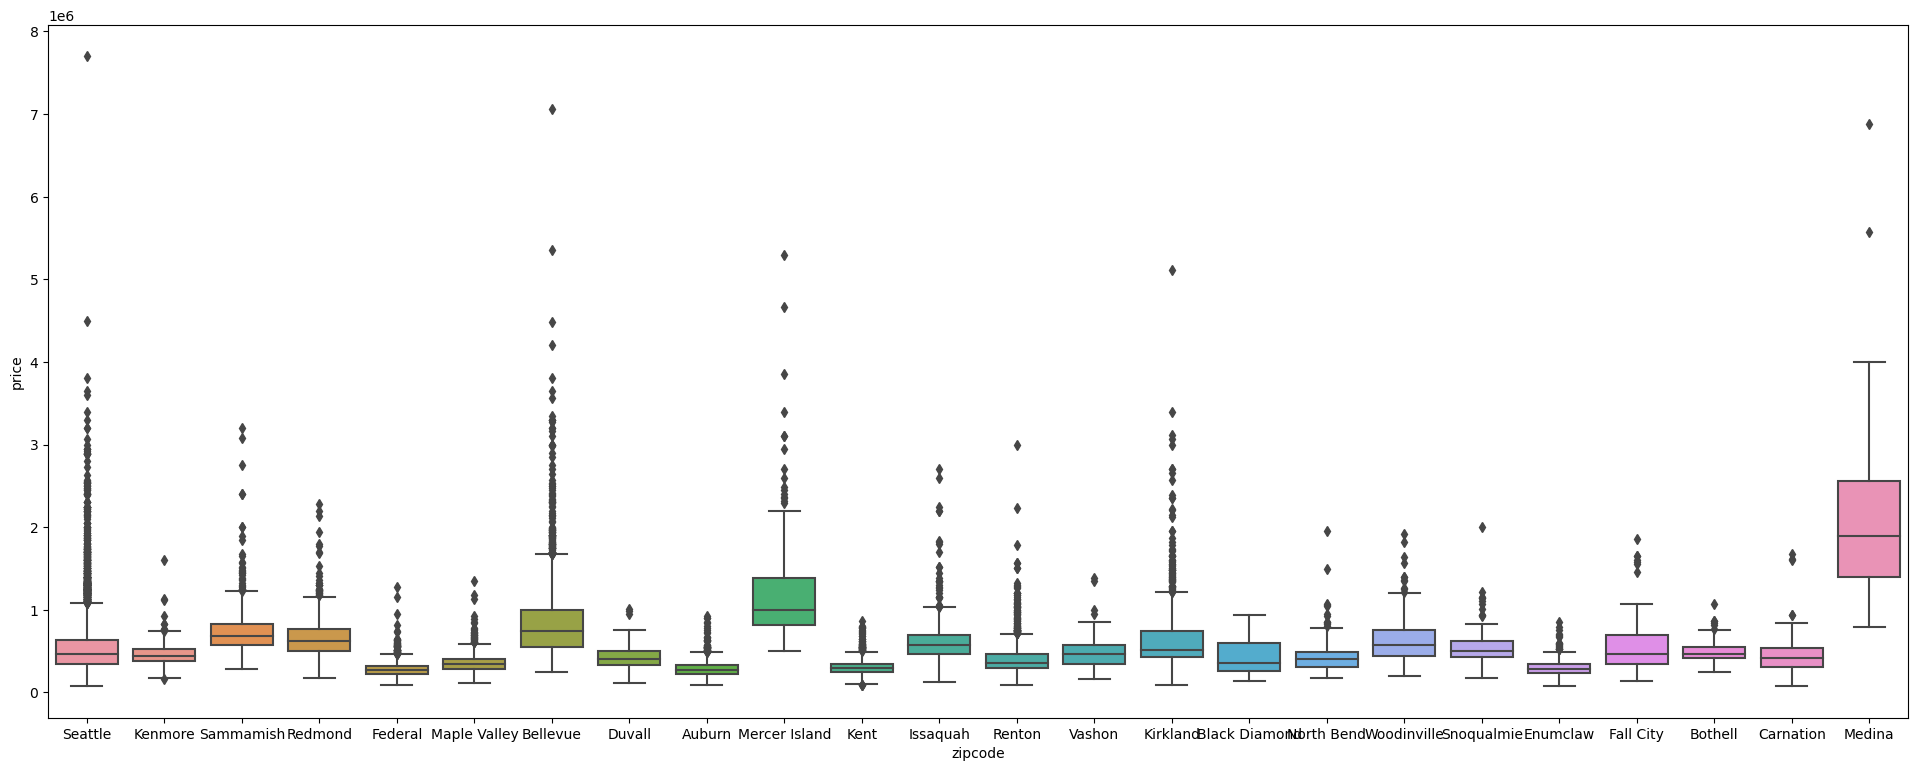

In [49]:
plt.figure(figsize= (24, 9))
sns.boxplot(x='zipcode', y='price', data= df)

# we see that locations do have a influence over the target variable, so we will keep the variable in the df

In [50]:
# Now that we have taken care of lot the features we will explore the relations between the predictors 
# and the target variable

# we will drop a few features before EDA

df.drop(['date', 'yr_built', 'yr_renovated', 'Date', 'age_of_house'], axis= 1, inplace= True)

In [51]:
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,weekday,Total_sqft,age_bins,renovations,sqft_liv_change,basement_size,living_size,above_size,sqft_lot_change,house_size
3486,207000.0,3,1.00,1080,10200,1.0,0,0,4,7,...,1,2160,41-60,Not Renovated,Increased,No Basement,Small,Small,Increased,Small
1862,765000.0,4,2.25,2620,17366,1.0,0,3,3,9,...,3,5240,21-40,Not Renovated,Unchanged,Huge,Huge,Moderate,Decreased,Huge
8280,359950.0,3,2.75,2540,8604,2.0,0,0,3,8,...,0,5080,21-40,Not Renovated,Decreased,No Basement,Large,Huge,Decreased,Large
5379,779000.0,3,1.75,2320,6400,1.0,0,2,4,8,...,1,4640,41-60,Not Renovated,Increased,Large,Large,Moderate,Increased,Large
5613,242500.0,3,1.50,1200,9720,1.0,0,0,4,7,...,4,2400,41-60,Not Renovated,Increased,No Basement,Small,Moderate,Increased,Small


In [52]:
objs_cols= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'Year', 'Month', 'dayofweek'
, 'age_bins', 'renovations', 'sqft_liv_change', 'basement_size', 'living_size', 'above_size'
, 'sqft_lot_change', 'house_size', 'quarter', 'zipcode']

num_cols= ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'
           , 'Total_sqft', ]

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

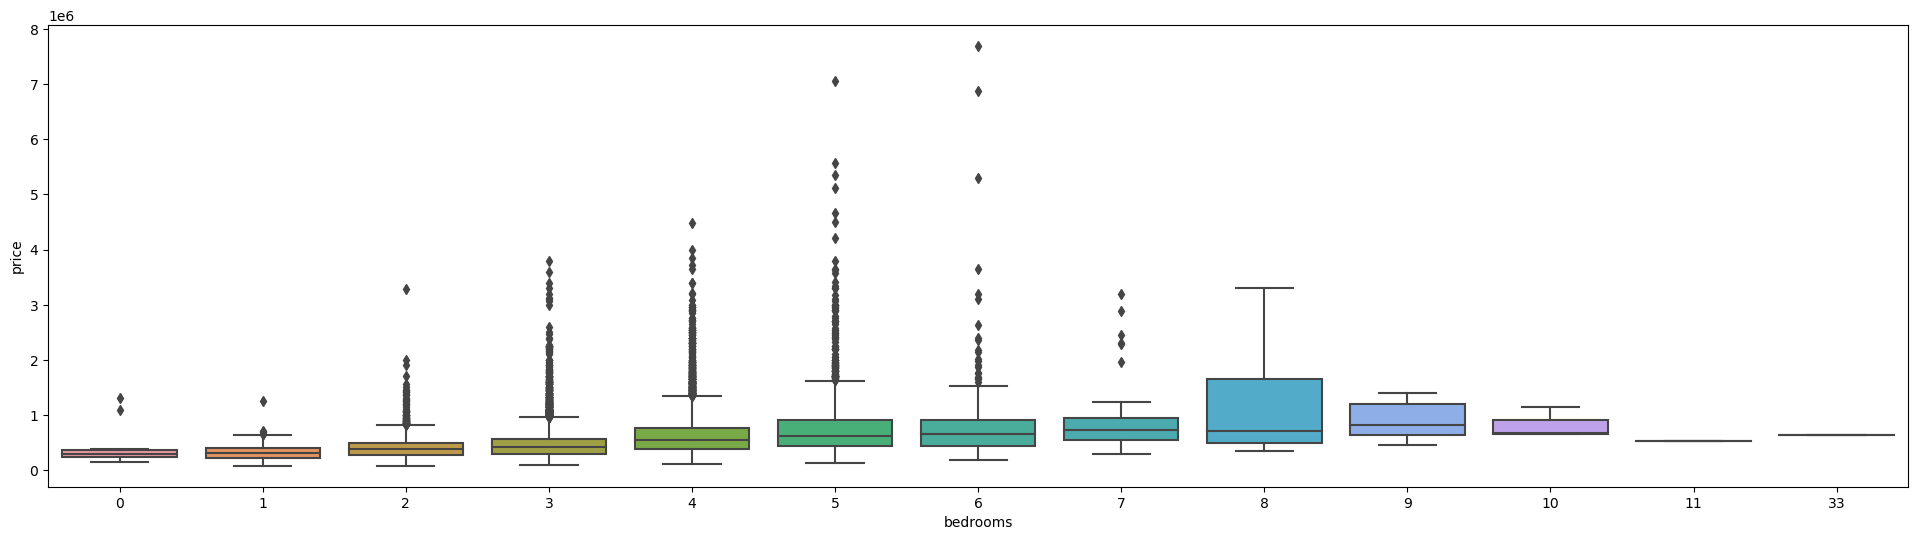

In [53]:
plt.figure(figsize= (24, 6))
sns.boxplot(x= 'bedrooms', y= 'price', data= df)

# we see that there are significant difference in price with higher number of bedrooms, except for 
# houses with greater than 8 rooms, this could also be due to locations

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

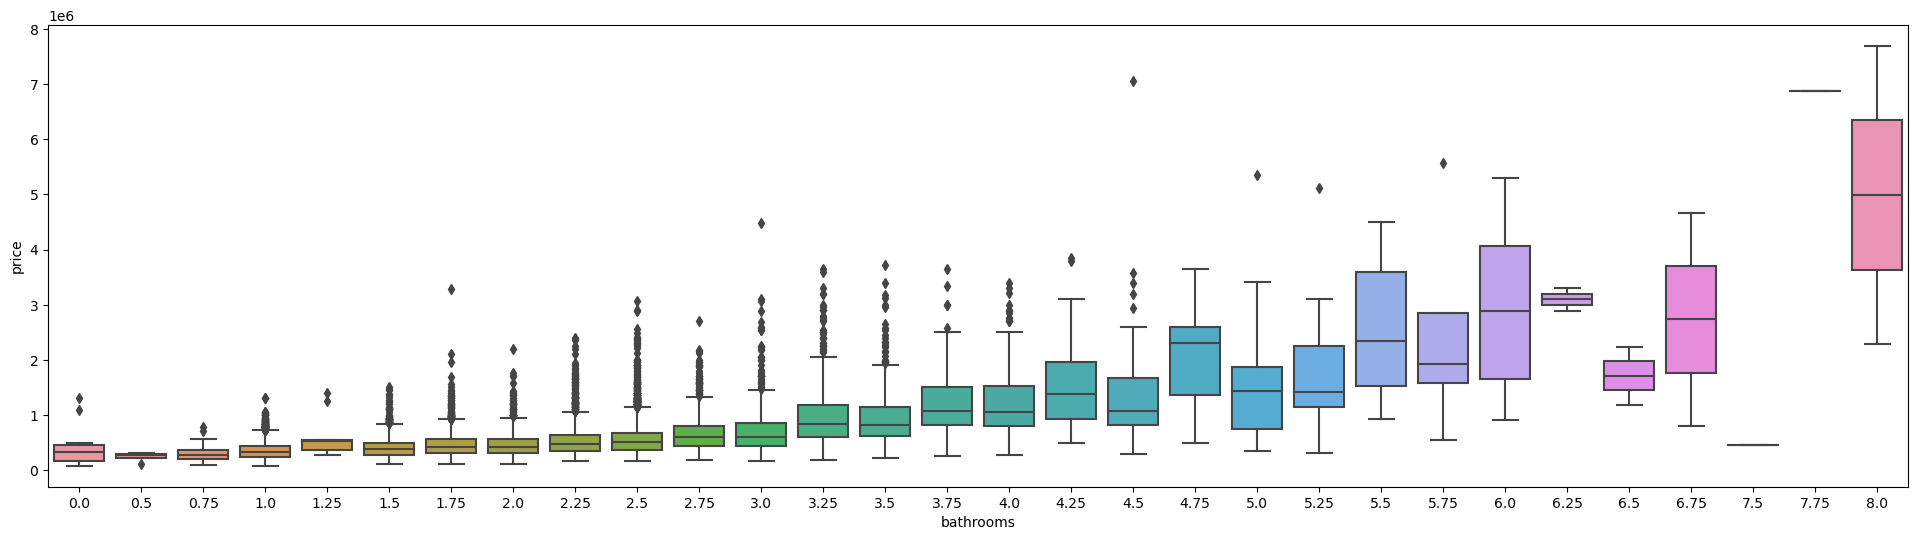

In [54]:
plt.figure(figsize= (24, 6))
sns.boxplot(x= 'bathrooms', y= 'price', data= df)
# see there are differences in house prices with higher number of bathrooms

<AxesSubplot:xlabel='floors', ylabel='price'>

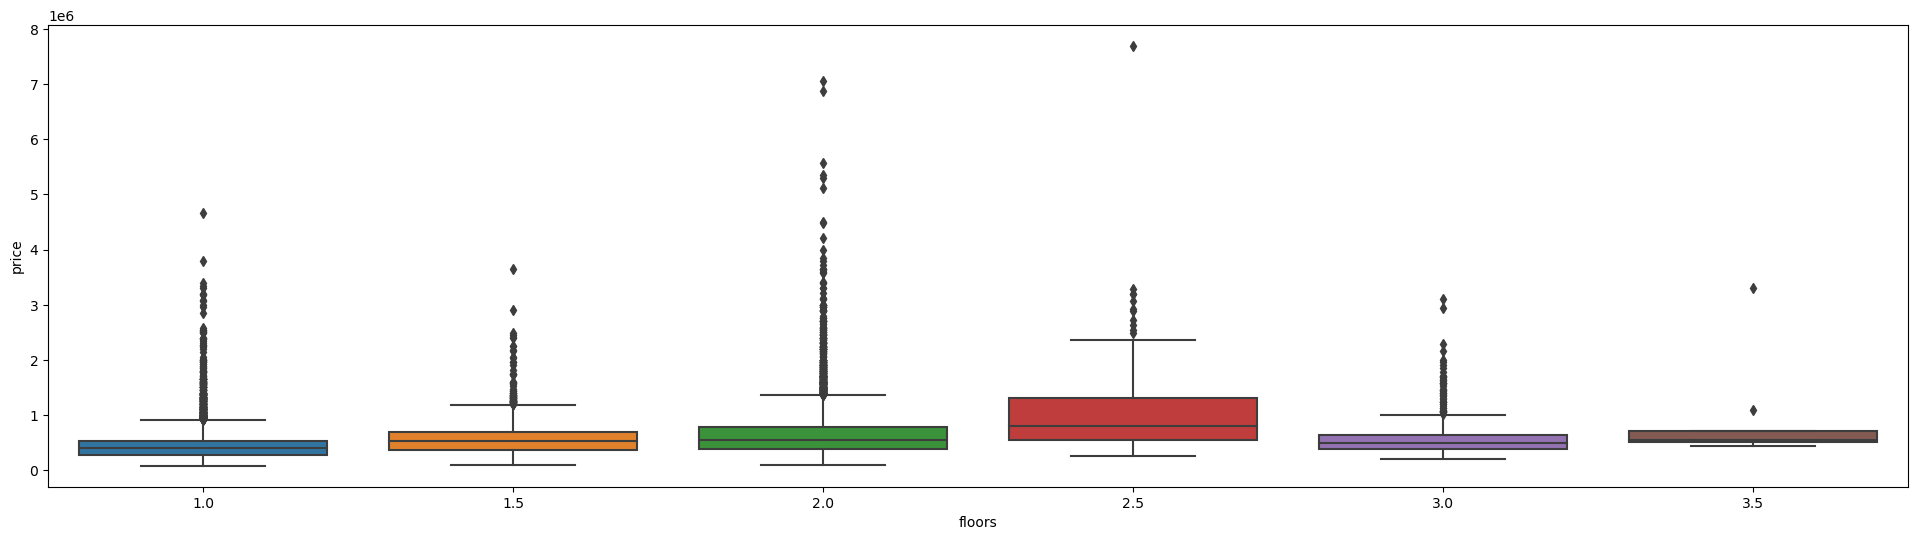

In [55]:
plt.figure(figsize= (24, 6))
sns.boxplot(x= 'floors', y= 'price', data= df)
# see there are differences in house prices with higher number of bathrooms

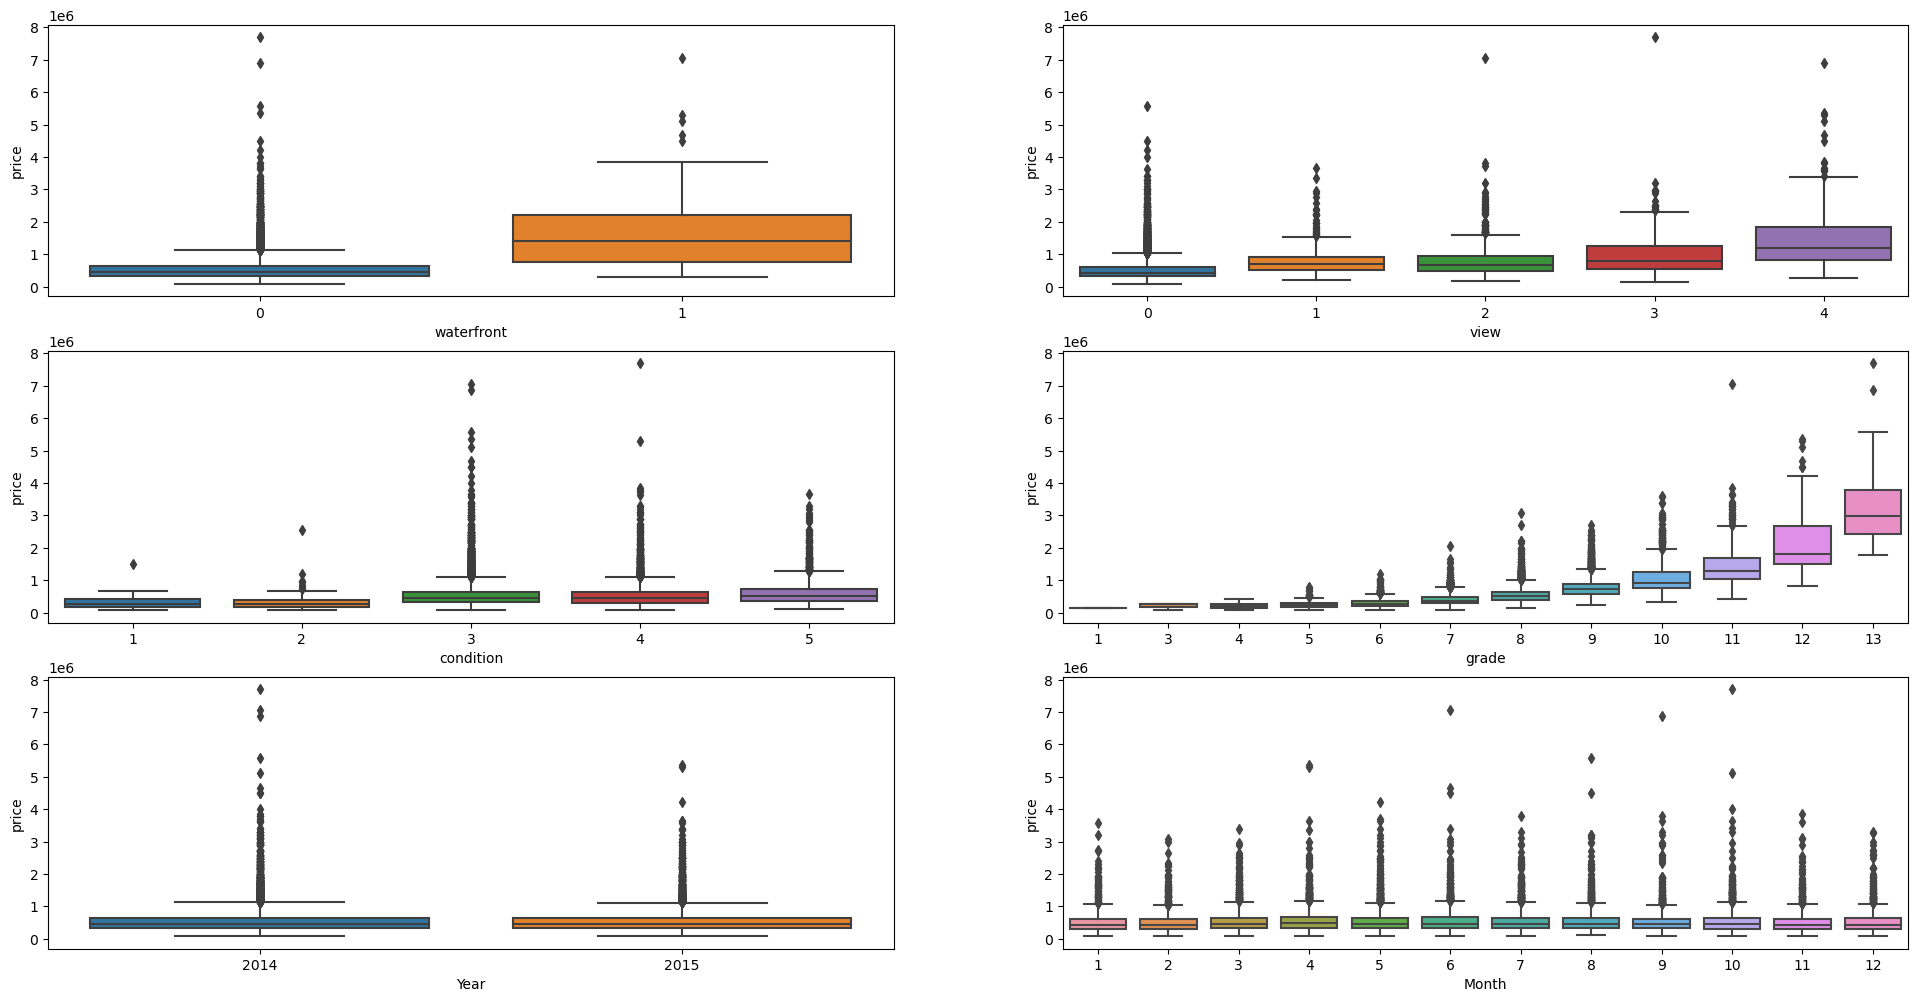

In [56]:
plt.figure(figsize= (24, 12))

for idx, col in enumerate(['waterfront', 'view', 'condition', 'grade', 'Year', 'Month']):
    
    plt.subplot(3, 2, idx+ 1)
    
    sns.boxplot(x= col, y= 'price', data= df)

<AxesSubplot:xlabel='condition', ylabel='price'>

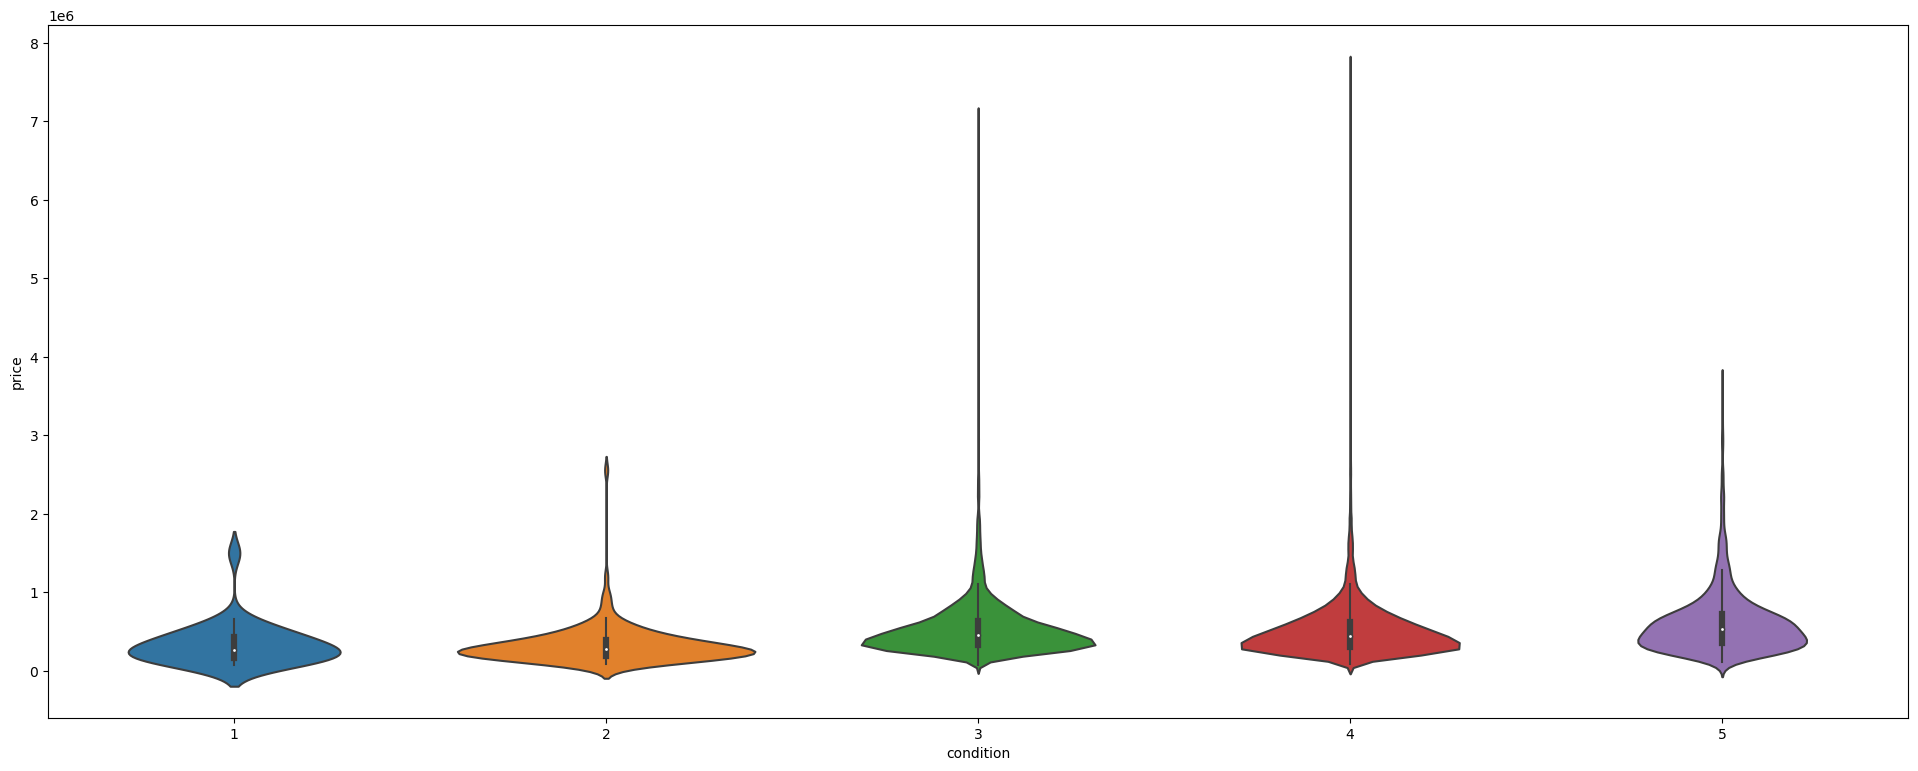

In [57]:
# we'll check the condition and months features a little more closely

plt.figure(figsize= (24, 9))
sns.violinplot(x= 'condition', y= 'price', data= df)

# condition does not seem to be such a good feature, but we will keep it and check feature importance

<AxesSubplot:xlabel='Month', ylabel='price'>

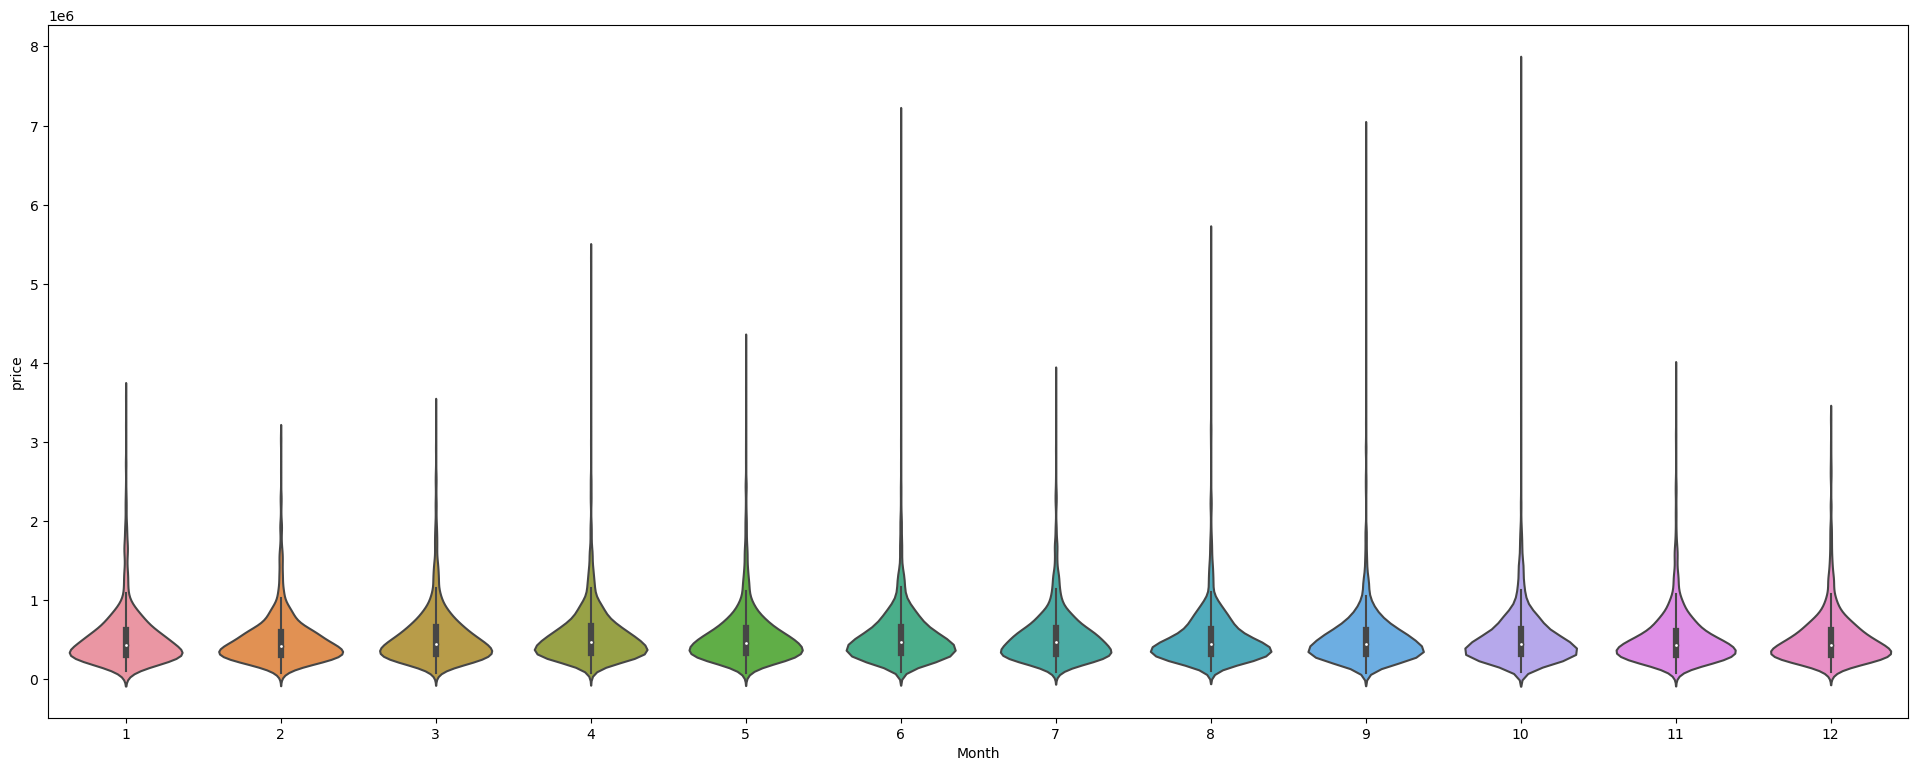

In [58]:
# we'll check the condition and months features a little more closely

plt.figure(figsize= (24, 9))
sns.violinplot(y= 'price', x= 'Month', data= df)

# Month also does'nt seem to be such a good feature, but we will keep it and check feature importance later

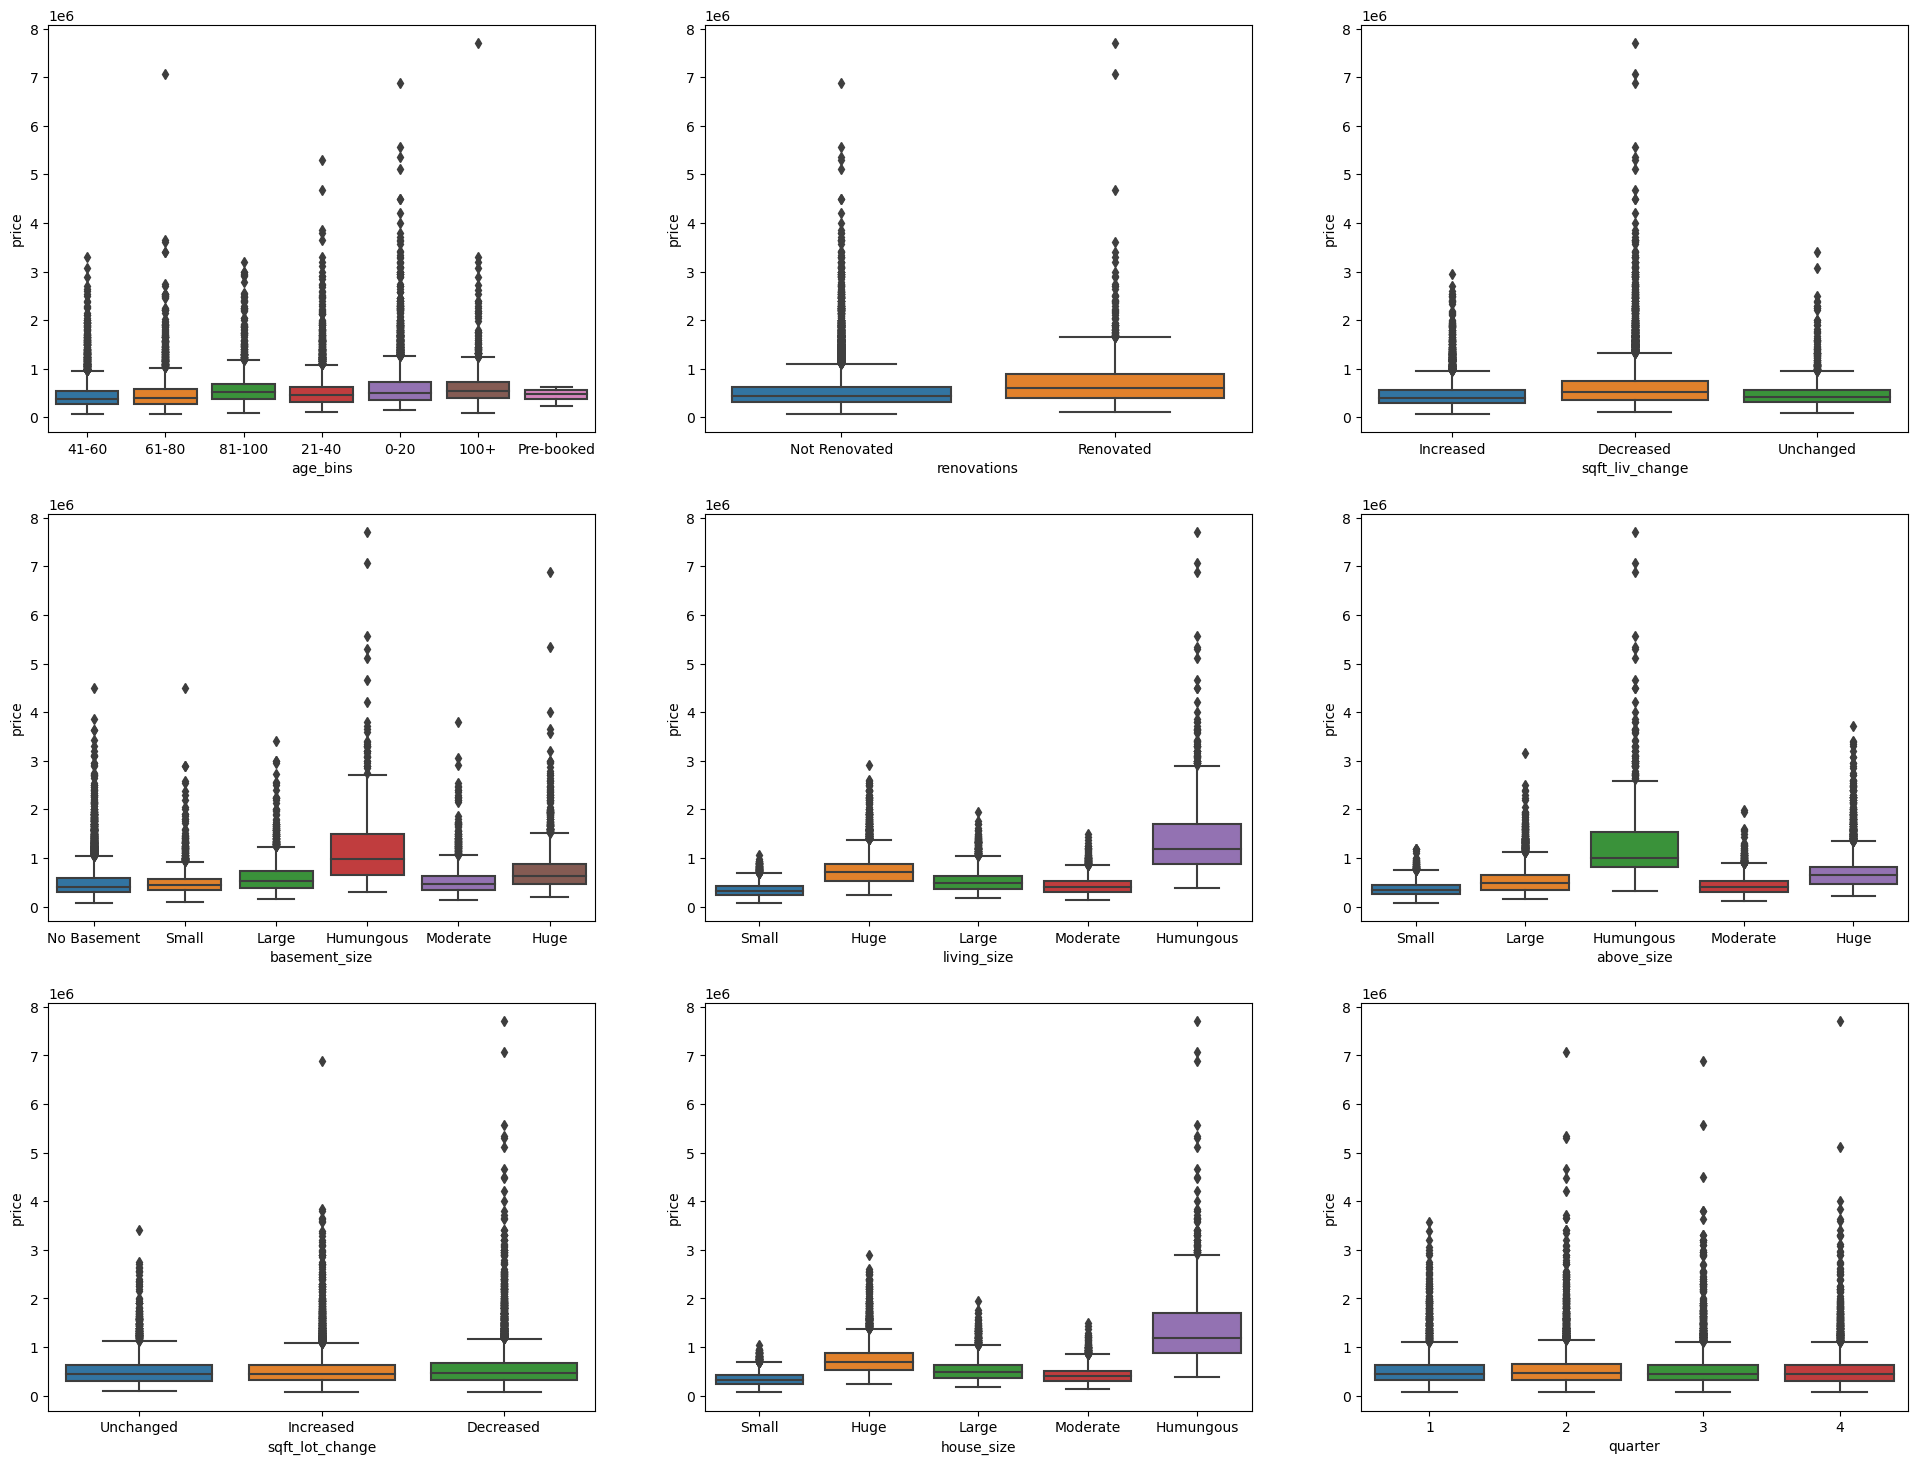

In [59]:
plt.figure(figsize= (24, 18))

for idx, col in enumerate(['age_bins', 'renovations', 'sqft_liv_change', 'basement_size', 'living_size', 'above_size','sqft_lot_change', 'house_size', 'quarter']):
    
    plt.subplot(3, 3, idx+1)
    
    sns.boxplot(x= col, y= 'price', data= df)

In [60]:
num_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'Total_sqft']

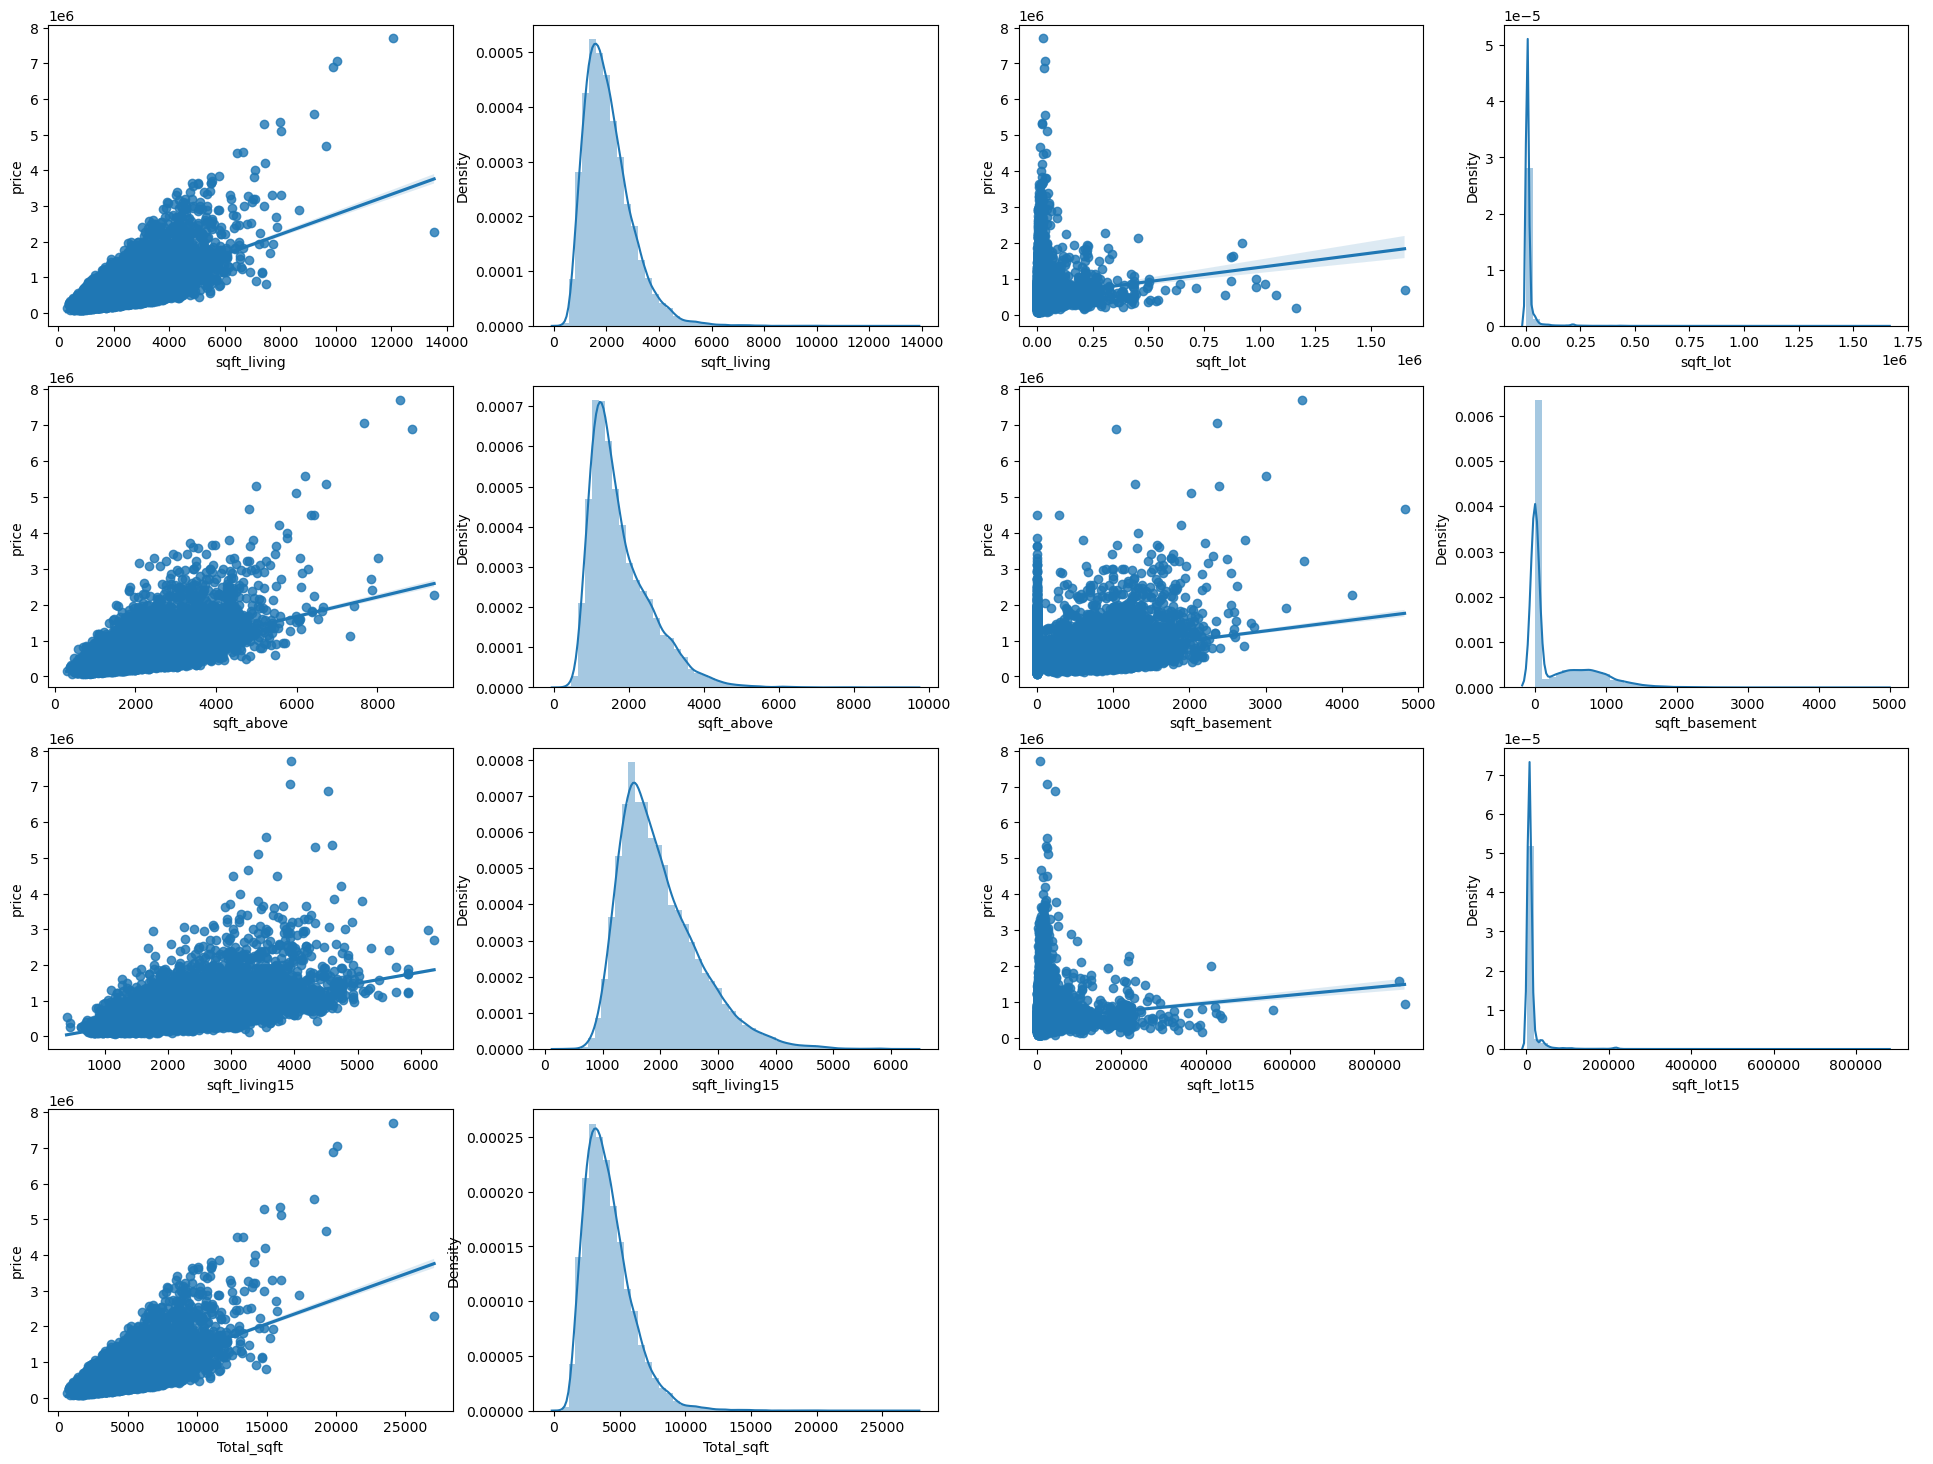

In [61]:
plt.figure(figsize= (24, 18))

count= 1

for idx, col in enumerate(num_cols):
    
    plt.subplot(4, 4, count)
    
    sns.regplot(x= col, y= 'price', data= df)
    plt.xlabel(col)
    
    count+=1
    
    plt.subplot(4, 4, count)
    sns.distplot(df[col])
    count+=1

<AxesSubplot:>

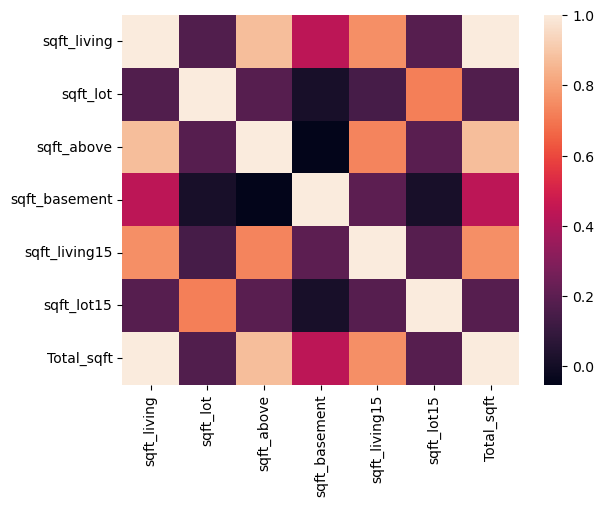

In [62]:
sns.heatmap(df[num_cols].corr())

In [63]:
# we'll drop the numerical columns from the DataFrame for now

df.sample(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,weekday,Total_sqft,age_bins,renovations,sqft_liv_change,basement_size,living_size,above_size,sqft_lot_change,house_size
21276,378950.0,4,2.5,1867,15314,2.0,0,0,3,9,...,2,3734,0-20,Not Renovated,Increased,No Basement,Moderate,Large,Decreased,Moderate
5014,764000.0,3,2.0,1420,4080,1.5,0,0,5,8,...,1,2840,100+,Not Renovated,Decreased,No Basement,Small,Moderate,Decreased,Small
19141,266490.0,3,2.5,1810,4113,2.0,0,0,3,7,...,1,3620,0-20,Not Renovated,Increased,No Basement,Moderate,Large,Increased,Moderate


In [64]:
df.drop(num_cols, axis= 1, inplace= True) #dropped

In [65]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'Year', 'Month', 'quarter', 'weekday',
       'age_bins', 'renovations', 'sqft_liv_change', 'basement_size',
       'living_size', 'above_size', 'sqft_lot_change', 'house_size'],
      dtype='object')

In [66]:
obj= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view','condition', 'grade', 'zipcode','Year'
      , 'Month', 'quarter','weekday', 'age_bins', 'renovations', 'sqft_liv_change', 'basement_size'
      , 'living_size', 'above_size', 'sqft_lot_change', 'house_size']

In [67]:
df[obj]= df[obj].applymap(str) #creating object from all the other features to make dummies

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21613 non-null  float64
 1   bedrooms         21613 non-null  object 
 2   bathrooms        21613 non-null  object 
 3   floors           21613 non-null  object 
 4   waterfront       21613 non-null  object 
 5   view             21613 non-null  object 
 6   condition        21613 non-null  object 
 7   grade            21613 non-null  object 
 8   zipcode          21613 non-null  object 
 9   Year             21613 non-null  object 
 10  Month            21613 non-null  object 
 11  quarter          21613 non-null  object 
 12  weekday          21613 non-null  object 
 13  age_bins         21613 non-null  object 
 14  renovations      21613 non-null  object 
 15  sqft_liv_change  21613 non-null  object 
 16  basement_size    21613 non-null  object 
 17  living_size 

In [69]:
df_train= pd.get_dummies(df, drop_first=True)

In [70]:
print(df_train.shape)
df_train.head()

(21613, 139)


,price,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,...,above_size_Humungous,above_size_Large,above_size_Moderate,above_size_Small,sqft_lot_change_Increased,sqft_lot_change_Unchanged,house_size_Humungous,house_size_Large,house_size_Moderate,house_size_Small
0,221900.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,538000.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,180000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,604000.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4,510000.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [71]:
# we have 112 columns we'll go with it for now

X, y= df_train.drop('price', axis= 1),df_train['price']

In [72]:
print(y.min(), y.max())

75000.0 7700000.0


In [73]:
y= y.div(1000)
y.min(), y.max()

(75.0, 7700.0)

In [74]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 138), (4323, 138), (17290,), (4323,))

In [75]:
print(y_train.head())
print(y_test.head())

14305    848.00
19844    659.95
2686     343.00
11926    522.50
13873    390.00
Name: price, dtype: float64
5506     532.5
9279     410.0
16034    782.5
6608     995.0
20359    279.0
Name: price, dtype: float64


In [76]:
y_test.reset_index(drop= True, inplace= True)

In [77]:
y_test.head()

0    532.5
1    410.0
2    782.5
3    995.0
4    279.0
Name: price, dtype: float64

In [78]:
lr= LinearRegression()

lr.fit(X_train, y_train)

lr_pred= lr.predict(X_test)

print(mean_squared_error(y_test, lr_pred))
print(r2_score(y_test, lr_pred))

2.5045187372043213e+26
-1.7734776070733895e+21


In [79]:
pd.concat([y_test, pd.Series(lr_pred)], axis= 1).sample(10)

,price,0
2589,225.0,398.806468
2049,525.0,766.900218
4145,347.0,296.493968
720,250.0,505.238461
2266,569.0,582.822093
2166,384.2,438.681468
109,628.0,612.197498
1224,1480.0,1206.556468
2984,762.5,822.639859
814,449.4,377.118968


In [80]:
d_tree= DecisionTreeRegressor()

d_tree.fit(X_train, y_train)

d_pred= d_tree.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, d_pred)))
print(r2_score(y_test, d_pred))

# we have better results here than the linear model
# we will no try for Random Forest

223.82320546655734
0.6452587872806637


In [81]:
pd.concat([y_test, pd.Series(d_pred)], axis= 1).head(10)

,price,0
0,532.5,592.10
1,410.0,619.95
2,782.5,839.90
3,995.0,1010.00
4,279.0,275.00
5,175.0,250.00
6,689.0,566.00
7,275.0,379.95
8,465.0,334.99
9,506.0,345.10


In [82]:
rf_reg= RandomForestRegressor() # we'll just fit of the book RandomForest model

rf_reg.fit(X_train, y_train)

rf_pred= rf_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, rf_pred)))
print(r2_score(y_test, rf_pred))

# we have a slightly better model with the RandomForest model
# let's check gradient boosting and extra trees and SGD regressors and then we will start fine tuning our 
# model

172.1276476276995
0.7902013491214075


In [83]:
pd.concat([y_test, pd.Series(rf_pred)], axis= 1).head(8)

,price,0
0,532.5,574.58300
1,410.0,389.79682
2,782.5,795.65134
3,995.0,982.35990
4,279.0,277.56295
5,175.0,293.12100
6,689.0,635.12350
7,275.0,390.86850


In [84]:
gbm_reg = GradientBoostingRegressor() #we'll again use off the book model here then fine tune it later

et_reg= ExtraTreesRegressor()

sgd_reg= SGDRegressor()

In [85]:
gbm_reg.fit(X_train, y_train)

gbm_pred= gbm_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbm_pred)))
print(r2_score(y_test, gbm_pred))
# we get better score than RandomForest

174.13159087114087
0.7852878802303807


In [86]:
et_reg.fit(X_train, y_train)

et_pred= et_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, et_pred)))
print(r2_score(y_test, et_pred))

# this didn't perform as well as the others

211.63643164882615
0.682837169655155


In [87]:
sgd_reg.fit(X_train, y_train)

sgd_pred= sgd_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, sgd_pred)))
print(r2_score(y_test, sgd_pred))

# we get a better model than a simple linear model
# we will see if we can stack this model later

181.91100410137122
0.7656746004795529


In [88]:
# for now we will use Grid search for hyper parameter tuning

gb_params= {'alpha':[.8, .7, .9],
            'max_depth': np.arange(1, 10, 1), 
            'max_features':[.7, .8]
            }

gb_grid= GridSearchCV(gbm_reg, gb_params, scoring= 'r2', cv= 5, n_jobs=-1, verbose= 1)

gb_grid.fit(X_train, y_train)

gb_grid_pred= gb_grid.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gb_grid_pred)))
print(r2_score(y_test, gb_grid_pred))

# we did get a better score, we will train a model with the best estimator from our grid search and train
# the model again

Fitting 5 folds for each of 54 candidates, totalling 270 fits
164.08905321639247
0.8093395374155399


In [89]:
gbm_reg= gb_grid.best_estimator_

In [90]:
gbm_reg.fit(X_train, y_train)

gbm_pred = gbm_reg.predict(X_test)

r2_score(y_test, gbm_pred)

# we see that we have a better score.

0.8046871718983566

In [91]:
gbm_reg.fit(X, y)

gbm_pred1= gbm_reg.predict(X)

r2_score(y, gbm_pred1)

# we see that the model is giving 89% r2score

0.8992706574835165